In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ktrain

In [ ]:
import ktrain

# print(tf.__version__)
# print(keras.__version__)
print(ktrain.__version__)

0.41.3


In [ ]:
import argparse
import os
import ktrain
import pandas as pd
from ktrain import text
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

In [ ]:
path = '/content/drive/MyDrive/Thesis Dataset/result'

In [ ]:
import os
os.listdir(path)

['BB1', 'Roberta', 'BB2', 'mbert', 'distilmbert']

In [ ]:
model_names = ['BB1', 'Roberta', 'BB2', 'mbert', 'distilmbert']

In [ ]:
test_path = "/content/drive/MyDrive/Thesis Dataset/test_datan.csv"
test_data = pd.read_csv(test_path)

In [ ]:
total_categories = test_data['label'].nunique()
print("Total number of categories:", total_categories)

Total number of categories: 5


In [ ]:
total_categories = test_data['label'].nunique()
unique_classes = test_data['label'].unique()
print("Total number of categories:", total_categories)
print("Unique classes:", unique_classes)


Total number of categories: 5
Unique classes: ['Cyber Security' 'Operating System' 'DBMS' 'Data Communication'
 'Software Engineering']


In [ ]:
# Assuming 'test_data' is your DataFrame containing the test data

# Check for NaN values in the 'label' column
nan_count = test_data['label'].isna().sum()

if nan_count > 0:
    print("There are NaN values in the 'label' column.")
    # Optionally, you can print the indices of the NaN values
    nan_indices = test_data[test_data['label'].isna()].index
    print("Indices of NaN values:", nan_indices)
else:
    print("There are no NaN values in the 'label' column.")


There are no NaN values in the 'label' column.


In [ ]:
# Assuming 'test_data' is your DataFrame containing the test data

# Check for NaN values in the 'label' column
nan_count = test_data['label'].isna().sum()

if nan_count > 0:
    print("There are NaN values in the 'label' column.")
    # Optionally, you can print the indices of the NaN values
    nan_indices = test_data[test_data['cleaned'].isna()].index
    print("Indices of NaN values:", nan_indices)
else:
    print("There are no NaN values in the 'cleaned' column.")

There are no NaN values in the 'cleaned' column.


In [ ]:
X_test = test_data['cleaned'].tolist()
y_test = test_data['label'].tolist()

In [ ]:
!pip install transformers==4.37.2

In [ ]:
# Inspect the methods available in the preproc object
print(dir(predictor.preproc))


['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_load_pretrained', '_transform_y', 'batch_size', 'c', 'check_trained', 'config', 'get_classes', 'get_classifier', 'get_config', 'get_model', 'get_preprocessor', 'get_regression_model', 'get_tokenizer', 'hf_convert_examples', 'is_chinese', 'is_nospace_lang', 'lang', 'load_model_and_configure_from_data', 'max_features', 'maxlen', 'migrate_classes', 'model_name', 'model_type', 'multilabel', 'name', 'ngram_range', 'preprocess', 'preprocess_test', 'preprocess_train', 'preprocess_train_called', 'print_seqlen_stats', 'process_chinese', 'save_tokenizer', 'seqlen_stats', 'set

In [ ]:
import os
import ktrain

# Define the path to the directory containing the models
path = '/content/drive/MyDrive/Thesis Dataset/result/'

# Initialize dictionaries to store predictions and probabilities
y_preds = {}
probabilities = {}

# Iterate through each model name
for model_name in model_names:
    print("\n\nModel name:", model_name)
    print("Model path:", os.path.join(path, model_name))

    # Load the predictor for the current model
    predictor = ktrain.load_predictor(os.path.join(path, model_name))

    # Make predictions and probabilities for the test data
    y_pred = predictor.predict(X_test)
    prob = predictor.predict_proba(X_test)

    # Store the predictions and probabilities in dictionaries
    y_preds[model_name] = y_pred
    probabilities[model_name] = prob




Model name: BB1
Model path: /content/drive/MyDrive/Thesis Dataset/result/BB1


Model name: Roberta
Model path: /content/drive/MyDrive/Thesis Dataset/result/Roberta


Model name: BB2
Model path: /content/drive/MyDrive/Thesis Dataset/result/BB2


Model name: mbert
Model path: /content/drive/MyDrive/Thesis Dataset/result/mbert


Model name: distilmbert
Model path: /content/drive/MyDrive/Thesis Dataset/result/distilmbert


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have test data inputs in 'X_test' and true labels in 'y_test'

# Initialize a dictionary to store classification reports
classification_reports = {}

# Loop through each model name
for model_name, y_pred in y_preds.items():
    print("\n\nModel name:", model_name)

    # Generate classification report
    report = classification_report(y_test, y_pred, digits=4)

    # Store the classification report in the dictionary
    classification_reports[model_name] = report

    # Print the classification report
    print("Classification Report:")
    print(report)



Model name: BB1
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security     0.9650    0.9079    0.9356       152
                DBMS     0.8994    0.8720    0.8854       164
  Data Communication     0.9167    0.8919    0.9041       148
    Operating System     0.8013    0.9167    0.8551       132
Software Engineering     0.8797    0.8731    0.8764       134

            accuracy                         0.8918       730
           macro avg     0.8924    0.8923    0.8913       730
        weighted avg     0.8952    0.8918    0.8925       730



Model name: Roberta
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security     0.9388    0.9079    0.9231       152
                DBMS     0.9062    0.8841    0.8951       164
  Data Communication     0.9156    0.9527    0.9338       148
    Operating System     0.8824    0.9091    0.8955       132
Software Engineering     0.9173    0.9104 

##Weighted ensemble

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store precision, recall, and F1 scores for each model
precision_list = {}
recall_list = {}
F1_list = {}

# Assuming you have already defined model_names, y_preds, and y_test

def draw_con_mat(cm, nm):
    plt.figure(figsize=(4, 3))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax) #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(nm, rotation=45)
    ax.yaxis.set_ticklabels(nm, rotation=45)
    ax.xaxis.tick_top()
    plt.show()

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf / np.sum(cf) for cf in cf]).flatten()]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))
        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')
    if not xyticks:
        categories = False
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories, annot_kws={"size": 13})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.yticks(rotation=45)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)
    plt.show()

def prediction_on_test_set(name, y_preds, y_test):
    print(name)
    y_pred = y_preds[name]
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(round(1 - accuracy_score(y_test, y_pred), 4) * 100)
    pr = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    re = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    precision_list[name] = pr
    recall_list[name] = re
    F1_list[name] = f1
    print("Acc: ", accuracy_score(y_test, y_pred))
    print("\nPrecision: ", pr)
    print("\nRecall: ", re)
    print("\nF1: ", f1)

for model_name in model_names:
    prediction_on_test_set(model_name, y_preds, y_test)

print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", F1_list)

def weighted_ensemble(models, y_preds, y_test, metric_list):
    classes = np.unique(y_test)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    weighted_votes = np.zeros((len(y_test), len(classes)))

    total_metric = sum(metric_list[model] for model in models)
    for model_name in models:
        weight = metric_list[model_name] / total_metric
        y_pred = y_preds[model_name]
        for i in range(len(y_pred)):
            class_idx = class_to_index[y_pred[i]]
            weighted_votes[i, class_idx] += weight

    final_predictions = np.argmax(weighted_votes, axis=1)
    index_to_class = {idx: cls for cls, idx in class_to_index.items()}
    final_predictions = np.array([index_to_class[idx] for idx in final_predictions])

    return final_predictions

def filter_classification_report(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, zero_division=0, output_dict=True)
    filtered_report_dict = {k: v for k, v in report_dict.items() if not (isinstance(v, dict) and v["support"] == 0)}
    filtered_target_names = [str(k) for k in filtered_report_dict.keys() if k not in ('accuracy', 'macro avg', 'weighted avg')]
    return classification_report(y_true, y_pred, zero_division=0, target_names=filtered_target_names), filtered_report_dict

results = {}
for r in range(2, len(model_names) + 1):
    combinations = list(itertools.combinations(model_names, r))
    for combo in combinations:
        print(f"Evaluating combination: {combo}")
        final_predictions = weighted_ensemble(combo, y_preds, y_test, F1_list)

        # Store predictions for each combination
        results[combo] = {
            "y_pred": final_predictions,  # Store the predictions
            "accuracy": accuracy_score(y_test, final_predictions),
            "precision": precision_score(y_test, final_predictions, average='weighted', zero_division=0),
            "recall": recall_score(y_test, final_predictions, average='weighted', zero_division=0),
            "f1": f1_score(y_test, final_predictions, average='weighted', zero_division=0),
            "confusion_matrix": confusion_matrix(y_test, final_predictions),
            "classification_report_str": filter_classification_report(y_test, final_predictions)[0],
            "classification_report_dict": filter_classification_report(y_test, final_predictions)[1]
        }

# Print out results with 4 decimal points
for combo, metrics in results.items():
    print(f"\nCombination: {combo}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1: {metrics['f1']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report_str'])

    # Access predictions for each combination
    y_pred = metrics['y_pred']
    # Do whatever you want with y_pred

    print("Predictions:")
    print(y_pred)



Streaming output truncated to the last 5000 lines.
 'Cyber Security' 'Operating System' 'Data Communication' 'DBMS'
 'Operating System' 'Cyber Security' 'Cyber Security' 'Data Communication'
 'Software Engineering' 'Cyber Security' 'Software Engineering'
 'Cyber Security' 'Operating System' 'Operating System'
 'Software Engineering' 'Cyber Security' 'DBMS' 'Software Engineering'
 'Software Engineering' 'DBMS' 'Cyber Security' 'Data Communication'
 'Software Engineering' 'Cyber Security' 'Operating System'
 'Cyber Security' 'Operating System' 'Cyber Security' 'Data Communication'
 'Operating System' 'Cyber Security' 'Operating System' 'DBMS'
 'Operating System' 'Data Communication' 'Cyber Security'
 'Data Communication' 'DBMS' 'DBMS' 'Operating System' 'Cyber Security'
 'Data Communication' 'DBMS' 'Software Engineering' 'Software Engineering'
 'DBMS' 'Software Engineering' 'DBMS' 'Operating System'
 'Operating System' 'DBMS' 'Cyber Security' 'DBMS' 'Data Communication'
 'Operating Syste

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store precision, recall, and F1 scores for each model
precision_list = {}
recall_list = {}
F1_list = {}

# Assuming you have already defined model_names, y_preds, and y_test

def draw_con_mat(cm, nm):
    plt.figure(figsize=(4, 3))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax) #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(nm, rotation=45)
    ax.yaxis.set_ticklabels(nm, rotation=45)
    ax.xaxis.tick_top()
    plt.show()

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf / np.sum(cf) for cf in cf]).flatten()]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))
        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')
    if not xyticks:
        categories = False
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories, annot_kws={"size": 13})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.yticks(rotation=45)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)
    plt.show()

def prediction_on_test_set(name, y_preds, y_test):
    print(name)
    y_pred = y_preds[name]
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(round(1 - accuracy_score(y_test, y_pred), 4) * 100)
    pr = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    re = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    precision_list[name] = pr
    recall_list[name] = re
    F1_list[name] = f1
    print("Acc: ", accuracy_score(y_test, y_pred))
    print("\nPrecision: ", pr)
    print("\nRecall: ", re)
    print("\nF1: ", f1)

# Store confusion matrices for each model
confusion_matrices = {}

# Loop through model names to predict and evaluate each model
for model_name in model_names:
    prediction_on_test_set(model_name, y_preds, y_test)

    # Store confusion matrix for later use
    y_pred = y_preds[model_name]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

# Print out confusion matrix for each model
for model_name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)

# Print out results with 4 decimal points
for combo, metrics in results.items():
    print(f"\nCombination: {combo}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1: {metrics['f1']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report_str'])




BB1
                      precision    recall  f1-score   support

      Cyber Security       0.97      0.91      0.94       152
                DBMS       0.90      0.87      0.89       164
  Data Communication       0.92      0.89      0.90       148
    Operating System       0.80      0.92      0.86       132
Software Engineering       0.88      0.87      0.88       134

            accuracy                           0.89       730
           macro avg       0.89      0.89      0.89       730
        weighted avg       0.90      0.89      0.89       730

10.82
Acc:  0.8917808219178082

Precision:  0.895210096415205

Recall:  0.8917808219178082

F1:  0.892529504515287
Roberta
                      precision    recall  f1-score   support

      Cyber Security       0.94      0.91      0.92       152
                DBMS       0.91      0.88      0.90       164
  Data Communication       0.92      0.95      0.93       148
    Operating System       0.88      0.91      0.90       132
S

In [ ]:
# Find the best combination based on a specific evaluation metric
best_combination = max(results, key=lambda x: results[x]['accuracy'])  # Change 'accuracy' to the desired metric

# Get the predictions made by the best combination
best_predictions = results[best_combination]['y_pred']

# Perform error analysis on the predictions made by the best combination
conf_matrix_best = confusion_matrix(y_test, best_predictions)

# Print or visualize the confusion matrix for error analysis
print("Confusion Matrix for the Best Combination:")
print(conf_matrix_best)

# Optionally, you can also print other error metrics like accuracy, precision, recall, and F1-score for the best combination
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions, average='weighted', zero_division=0)
best_recall = recall_score(y_test, best_predictions, average='weighted', zero_division=0)
best_f1 = f1_score(y_test, best_predictions, average='weighted', zero_division=0)

print(f"Accuracy for the Best Combination: {best_accuracy:.4f}")
print(f"Precision for the Best Combination: {best_precision:.4f}")
print(f"Recall for the Best Combination: {best_recall:.4f}")
print(f"F1-score for the Best Combination: {best_f1:.4f}")


Confusion Matrix for the Best Combination:
[[140   4   2   3   3]
 [  3 151   2   3   5]
 [  3   0 142   2   1]
 [  1   3   5 121   2]
 [  2   4   1   2 125]]
Accuracy for the Best Combination: 0.9301
Precision for the Best Combination: 0.9302
Recall for the Best Combination: 0.9301
F1-score for the Best Combination: 0.9301


In [ ]:
# Find the best combination based on accuracy
best_combination = max(results, key=lambda x: results[x]['accuracy'])

# Get the accuracy of the best combination
best_accuracy = results[best_combination]['accuracy']

# Print the name of the best combination model and its accuracy
print(f"Best Performing Combination Model: {best_combination}")
print(f"Accuracy of the Best Performing Combination Model: {best_accuracy:.4f}")

# Get the predictions made by the best combination
best_predictions = results[best_combination]['y_pred']

# Perform error analysis on the predictions made by the best combination
conf_matrix_best = confusion_matrix(y_test, best_predictions)

# Print or visualize the confusion matrix for error analysis
print("\nConfusion Matrix for the Best Combination:")
print(conf_matrix_best)

# Optionally, you can also print other error metrics like precision, recall, and F1-score for the best combination
best_precision = results[best_combination]['precision']
best_recall = results[best_combination]['recall']
best_f1 = results[best_combination]['f1']

print(f"\nPrecision for the Best Combination: {best_precision:.4f}")
print(f"Recall for the Best Combination: {best_recall:.4f}")
print(f"F1-score for the Best Combination: {best_f1:.4f}")


Best Performing Combination Model: ('BB1', 'Roberta', 'mbert', 'distilmbert')
Accuracy of the Best Performing Combination Model: 0.9301

Confusion Matrix for the Best Combination:
[[140   4   2   3   3]
 [  3 151   2   3   5]
 [  3   0 142   2   1]
 [  1   3   5 121   2]
 [  2   4   1   2 125]]

Precision for the Best Combination: 0.9302
Recall for the Best Combination: 0.9301
F1-score for the Best Combination: 0.9301


In [ ]:
from sklearn.metrics import classification_report

# Get the predictions made by the best combination
best_predictions = results[best_combination]['y_pred']
y_true = y_test  # Assuming y_test contains the true labels

# Generate the classification report
report = classification_report(y_true, best_predictions)

# Print the classification report
print("('BB1', 'Roberta', 'mbert', 'distilmbert'):")
print(report)


('BB1', 'Roberta', 'mbert', 'distilmbert'):
                      precision    recall  f1-score   support

      Cyber Security       0.94      0.92      0.93       152
                DBMS       0.93      0.92      0.93       164
  Data Communication       0.93      0.96      0.95       148
    Operating System       0.92      0.92      0.92       132
Software Engineering       0.92      0.93      0.93       134

            accuracy                           0.93       730
           macro avg       0.93      0.93      0.93       730
        weighted avg       0.93      0.93      0.93       730



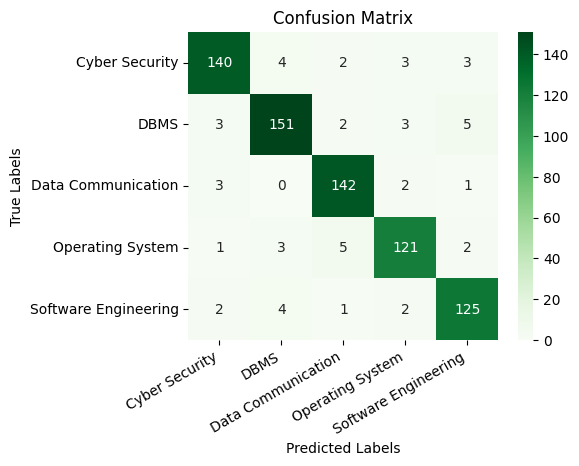

In [ ]:
# Get the confusion matrix from the results for the best combination
conf_matrix = results[best_combination]['confusion_matrix']

# Define class labels
class_labels = ['Cyber Security', 'DBMS', 'Data Communication', 'Operating System', 'Software Engineering']

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Rotate x-axis tick labels by 30 degrees
plt.xticks(rotation=30, ha='right')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

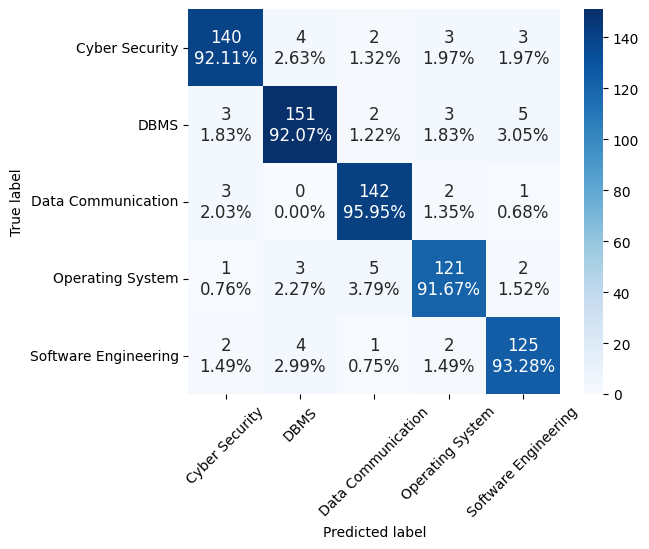

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf / np.sum(cf) for cf in cf]).flatten()]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))
        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(precision, recall, f1_score)
        else:
            stats_text = ""
    else:
        stats_text = ""
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')
    if not xyticks:
        categories = False
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories, annot_kws={"size": 12})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=45)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)
    plt.show()

# Assuming conf_matrix is your confusion matrix and class_labels is your list of class labels
make_confusion_matrix(conf_matrix, figsize=(6, 5), percent=True, categories=class_labels, cbar=True, cmap='Blues')


##Majority Voting ensemble

In [ ]:
from sklearn.metrics import classification_report

# Step 1: Generate all combinations of models
all_combinations = []
for r in range(2, len(model_names) + 1):
    combinations = list(itertools.combinations(model_names, r))
    all_combinations.extend(combinations)

# Step 2: Perform majority voting for each combination
results = {}
for combo in all_combinations:
    ensemble_predictions = []
    for sample_idx in range(len(y_test)):
        votes = Counter()
        for model_name in combo:
            model_predictions = y_preds[model_name]
            votes[model_predictions[sample_idx]] += 1
        majority_vote = votes.most_common(1)[0][0]
        ensemble_predictions.append(majority_vote)

    # Step 3: Evaluate the ensemble predictions
    accuracy = accuracy_score(y_test, ensemble_predictions)
    precision = precision_score(y_test, ensemble_predictions, average='weighted')
    recall = recall_score(y_test, ensemble_predictions, average='weighted')
    f1 = f1_score(y_test, ensemble_predictions, average='weighted')
    confusion_mat = confusion_matrix(y_test, ensemble_predictions)
    classification_rep = classification_report(y_test, ensemble_predictions)  # Generate classification report

    results[combo] = {
        "ensemble_predictions": ensemble_predictions,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion_mat,
        "classification_report": classification_rep  # Store classification report in results
    }

# Print the results for each combination
for combo, metrics in results.items():
    print(f"Combination: {combo}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Classification Report:\n{metrics['classification_report']}")  # Print classification report
    print()




Combination: ('BB1', 'Roberta')
Accuracy: 0.8918
Precision: 0.8952
Recall: 0.8918
F1-score: 0.8925
Confusion Matrix:
[[138   2   2   8   2]
 [  1 143   5   6   9]
 [  4   3 132   8   1]
 [  0   2   5 121   4]
 [  0   9   0   8 117]]
Classification Report:
                      precision    recall  f1-score   support

      Cyber Security       0.97      0.91      0.94       152
                DBMS       0.90      0.87      0.89       164
  Data Communication       0.92      0.89      0.90       148
    Operating System       0.80      0.92      0.86       132
Software Engineering       0.88      0.87      0.88       134

            accuracy                           0.89       730
           macro avg       0.89      0.89      0.89       730
        weighted avg       0.90      0.89      0.89       730


Combination: ('BB1', 'BB2')
Accuracy: 0.8918
Precision: 0.8952
Recall: 0.8918
F1-score: 0.8925
Confusion Matrix:
[[138   2   2   8   2]
 [  1 143   5   6   9]
 [  4   3 132   8   1]


In [ ]:
# Find the best performing combination based on accuracy
best_combo = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_accuracy = results[best_combo]['accuracy']

# Print information about the best performing combination
print(f"Best Performing Combination (Accuracy: {best_accuracy:.4f}): {best_combo}")

# Generate and print confusion matrix for the best performing combination
best_confusion_matrix = results[best_combo]['confusion_matrix']
print("Confusion Matrix for Best Performing Combination:")
print(best_confusion_matrix)


Best Performing Combination (Accuracy: 0.9342): ('BB1', 'Roberta', 'BB2', 'mbert', 'distilmbert')
Confusion Matrix for Best Performing Combination:
[[143   1   2   4   2]
 [  2 148   3   4   7]
 [  2   0 144   1   1]
 [  2   3   5 120   2]
 [  0   4   0   3 127]]


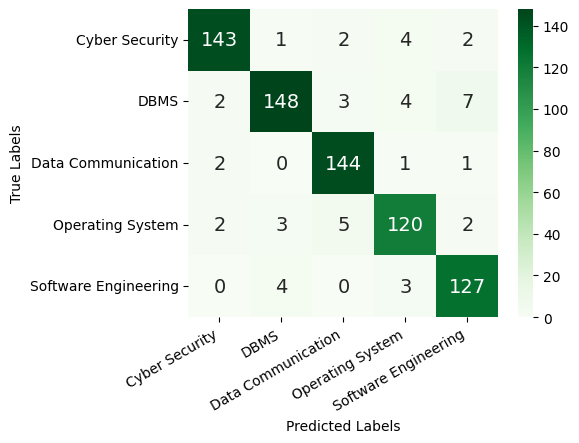

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix from the results for the best combination
conf_matrix = results[best_combo]['confusion_matrix']

# Define class labels
class_labels = ['Cyber Security', 'DBMS', 'Data Communication', 'Operating System', 'Software Engineering']

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xticks(rotation=30, ha='right')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()



In [ ]:
# Get the ensemble predictions for the best performing combination
ensemble_predictions = results[best_combo]['ensemble_predictions']

# Find misclassified samples
misclassified_samples = []
for i in range(len(y_test)):
    if y_test[i] != ensemble_predictions[i]:
        misclassified_samples.append(i)

# Print the misclassified samples
print("Misclassified Samples:")
for idx in misclassified_samples:
    print(f"Sample {idx}: Predicted - {ensemble_predictions[idx]}, True - {y_test[idx]}")


Misclassified Samples:
Sample 12: Predicted - Operating System, True - Cyber Security
Sample 17: Predicted - Operating System, True - DBMS
Sample 43: Predicted - Cyber Security, True - Operating System
Sample 46: Predicted - DBMS, True - Operating System
Sample 82: Predicted - Software Engineering, True - Cyber Security
Sample 121: Predicted - Operating System, True - Software Engineering
Sample 126: Predicted - Operating System, True - Cyber Security
Sample 133: Predicted - Data Communication, True - Cyber Security
Sample 153: Predicted - Software Engineering, True - DBMS
Sample 154: Predicted - Data Communication, True - DBMS
Sample 158: Predicted - Operating System, True - DBMS
Sample 172: Predicted - Data Communication, True - Operating System
Sample 207: Predicted - Data Communication, True - Cyber Security
Sample 214: Predicted - Data Communication, True - Operating System
Sample 217: Predicted - DBMS, True - Software Engineering
Sample 222: Predicted - Cyber Security, True - DBM

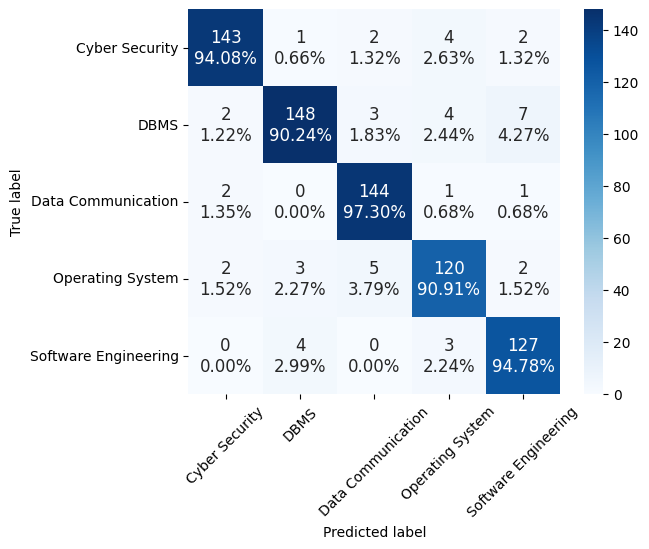

KeyError: 'Cyber Security'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def make_classification_report(y_true, y_pred, group_names=None):
    report = classification_report(y_true, y_pred, output_dict=True)

    if group_names is None:
        group_names = list(report.keys())

    results = []
    for label in group_names:
        label_report = report[label]
        results.append([label_report['precision'], label_report['recall'], label_report['f1-score'], label_report['support']])

    results.append(list(report['macro avg'].values())[:-1])
    results.append(list(report['weighted avg'].values())[:-1])

    return np.array(results)

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf / np.sum(cf) for cf in cf]).flatten()]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))
        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(precision, recall, f1_score)
        else:
            stats_text = ""
    else:
        stats_text = ""
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')
    if not xyticks:
        categories = False
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories, annot_kws={"size": 12})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=45)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)
    plt.show()

    # Print classification report
    class_labels = categories if group_names is None else group_names
    classification_report_data = make_classification_report(y_true=np.arange(len(cf)), y_pred=np.arange(len(cf)), group_names=class_labels)
    report_table = classification_report_data[:-3]
    header = ["Precision", "Recall", "F1-Score", "Support"]
    table = plt.table(cellText=report_table, colLabels=header, rowLabels=class_labels, loc='bottom', cellLoc='center', rowLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    plt.axis('tight')
    plt.axis('off')
    plt.show()

# Assuming conf_matrix is your confusion matrix and class_labels is your list of class labels
make_confusion_matrix(conf_matrix, figsize=(6, 5), percent=True, categories=class_labels, cbar=True, cmap='Blues')


In [ ]:
from sklearn.metrics import classification_report

# Assuming ensemble_predictions is the predictions for the best performing combination
ensemble_predictions = results[best_combo]['ensemble_predictions']

# Generate classification report
classification_rep = classification_report(y_test, ensemble_predictions, target_names=class_labels, output_dict=True)

# Convert the classification report to a DataFrame for easier manipulation
import pandas as pd
classification_df = pd.DataFrame(classification_rep).transpose()

# Calculate percentage error
classification_df['Percentage Error'] = 100 * (1 - classification_df['recall'])

# Print the classification report
print("Classification Report with Percentage Error:")
print(classification_df)


Classification Report with Percentage Error:
                      precision    recall  f1-score     support  \
Cyber Security         0.959732  0.940789  0.950166  152.000000   
DBMS                   0.948718  0.902439  0.925000  164.000000   
Data Communication     0.935065  0.972973  0.953642  148.000000   
Operating System       0.909091  0.909091  0.909091  132.000000   
Software Engineering   0.913669  0.947761  0.930403  134.000000   
accuracy               0.934247  0.934247  0.934247    0.934247   
macro avg              0.933255  0.934611  0.933660  730.000000   
weighted avg           0.934644  0.934247  0.934162  730.000000   

                      Percentage Error  
Cyber Security                5.921053  
DBMS                          9.756098  
Data Communication            2.702703  
Operating System              9.090909  
Software Engineering          5.223881  
accuracy                      6.575342  
macro avg                     6.538929  
weighted avg           